In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt

In [3]:
def getTissuePositions(inputName,gridSize,dX,dY):
    
    NoOfTissues = 1
    NoOfTissuesBottom = 0
    
    #--------------------------------------------------
    # generate grids
    #--------------------------------------------------
    grid = []
    for x in range(-gridSize, gridSize+1):
        for y in range(-gridSize, gridSize+1):
            if x % 2 == 0:
                grid.append((x*200, y*200))
            else:
                grid.append((x*200, -y*200))

    grid_R =  grid[::-1]
    grid = np.array(grid)
    grid_R = np.array(grid_R)
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    points = pd.read_csv(inputName, header = None, sep=',')
    print(inputName + ' read!')
    print(str(points.shape[0]) + ' points found.')
    
#     if len(inputNames) > 1:
#         pointsList = []
#         for i in range(len(inputNames)):
#             pointsList.append(pd.read_csv(inputNames[i], header = None, sep=','))
#         points = pd.concat(pointsList)
#     else:
        
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    
    n = points.shape[0] #number of positions you selected for each slice to define the region of interest

    positions = np.empty((0,2))
    for i in range(0,NoOfTissuesBottom):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid_R + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))

    for i in range(NoOfTissuesBottom,NoOfTissues):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))
        
    # add displacement between 10x and 60x objectives
    positions = positions + [dX,dY]
    print(str(positions.shape[0]) + ' positions generated.')
    
    return positions
    

# Shared variables

In [3]:
gridSize = 50
notebookFolder = 'c:/Users/Leonardo/Dropbox/research/analysis/CNVs/notebook/210416_CNV006_DNA_labelling_test/'
positionsFolder = 'c:/Software/merfish-parameters/positions/'
imagingSettingsFolder = 'c:/Software/imaging-settings/210416_CNV006/' 
experimentName = 'CNV006'

# Displacement of 60X objective respect to 10X


In [4]:
objDisp = {'MERFISH3':[-259.6,  18.4], 
           'MERFISH8':[-352.2, -22.2]} # [dX, dY]

# sample 01 (MERFISH3)

In [11]:
sample = 1

inputName = f'{imagingSettingsFolder}sample_0{sample}/positions_01.txt'
positions = pd.read_csv(inputName, header = None, sep=',')
positions = positions + objDisp['MERFISH3']

# save intermediateddata to image settings folder
outputName = f'positions_{experimentName}_sample_0{sample}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')


92 positions saved to c:/Software/imaging-settings/210416_CNV006/sample_01/positions_CNV006_sample_01.txt!
92 positions saved to c:/Software/merfish-parameters/positions/positions_CNV006_sample_01.txt!


<IPython.core.display.Javascript object>


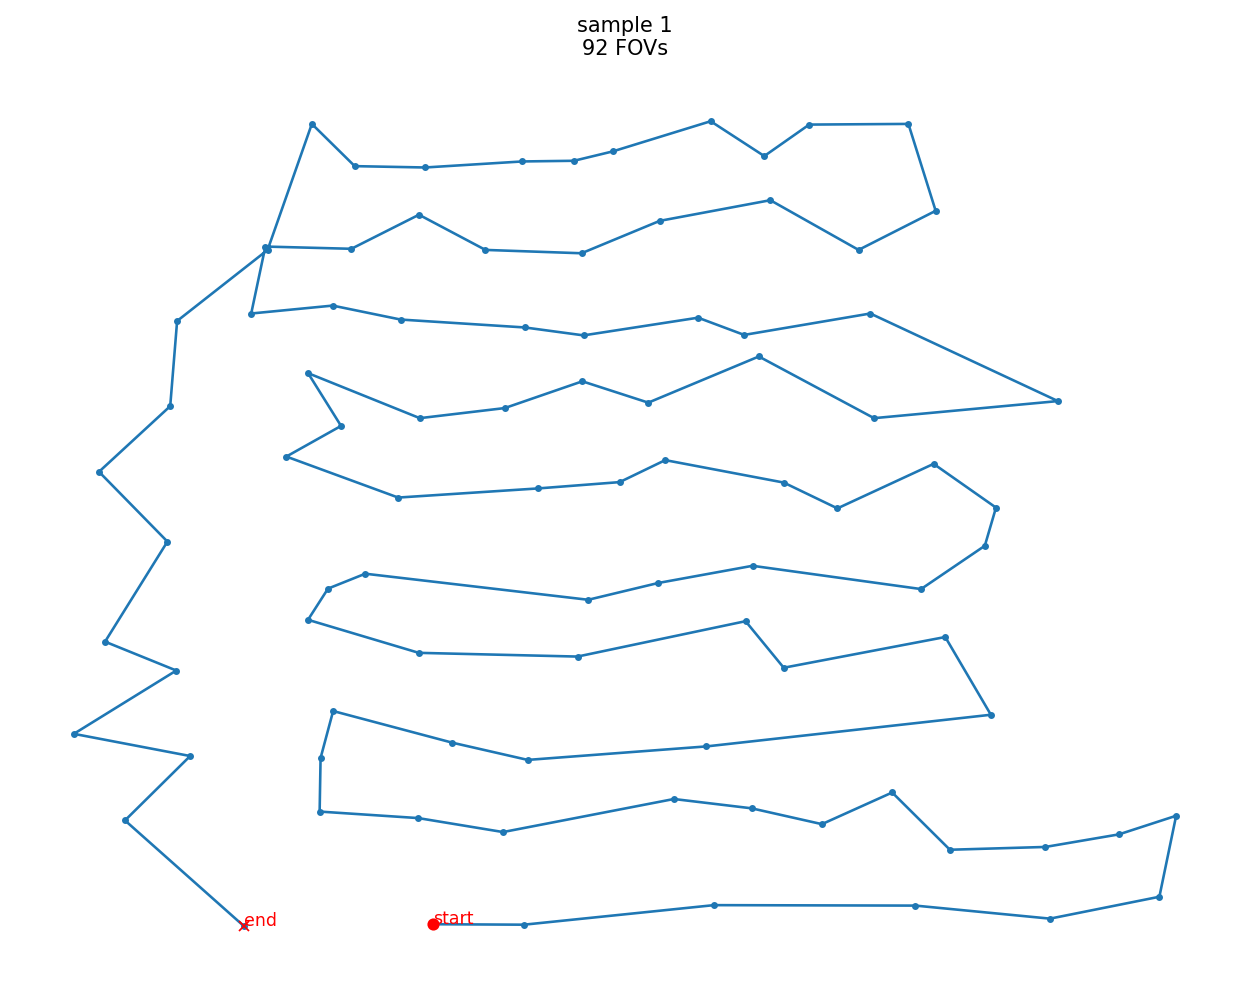

In [12]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputPath, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.text(positions.X.iloc[0],positions.Y.iloc[0],'start',c='r')

ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
ax.text(positions.X.iloc[-1],positions.Y.iloc[-1],'end',c='r')

ax.set_title(f'sample {sample}\n{positions.shape[0]} FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

# sample 04 (MERFISH3)

In [15]:
sample = 4

inputName = f'{imagingSettingsFolder}sample_0{sample}/positions_0.txt'
positions = pd.read_csv(inputName, header = None, sep=',')
positions = positions + objDisp['MERFISH3']

# save intermediateddata to image settings folder
outputName = f'positions_{experimentName}_sample_0{sample}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')


83 positions saved to c:/Software/imaging-settings/210416_CNV006/sample_04/positions_CNV006_sample_04.txt!
83 positions saved to c:/Software/merfish-parameters/positions/positions_CNV006_sample_04.txt!


<IPython.core.display.Javascript object>


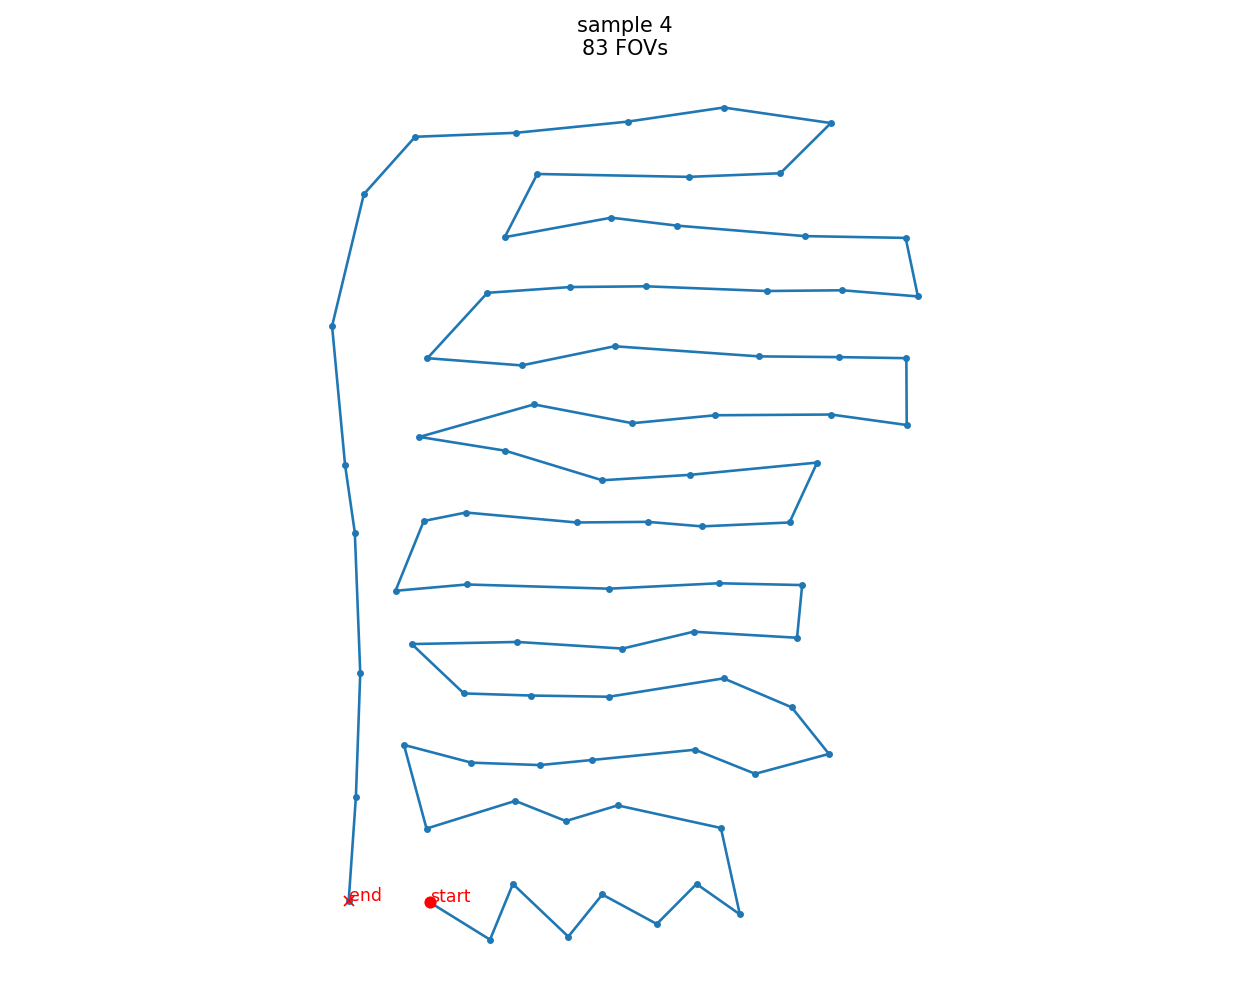

In [16]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputPath, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.text(positions.X.iloc[0],positions.Y.iloc[0],'start',c='r')

ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
ax.text(positions.X.iloc[-1],positions.Y.iloc[-1],'end',c='r')

ax.set_title(f'sample {sample}\n{positions.shape[0]} FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

In [28]:

counter = 0
channel = [0,1,3,4]
for i in range(40):
    print(f'\n<!-- 748, 637, 476, 405, {i*0.2:1.1f} um-->')
    for j in range(4):
        counter+=1
        print(f'  <event>')
        print(f'    <channel>{channel[j]}</channel>')
        print(f'    <power>1</power>')
        print(f'    <on>{counter-1:1.0f}</on>')
        print(f'    <off>{counter:1.0f}</off>')
        print(f'    <color>255,255,255</color>') 
        print(f'  </event>')


<!-- 748, 637, 476, 405, 0.0 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>0</on>
    <off>1</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>1</on>
    <off>2</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>3</channel>
    <power>1</power>
    <on>2</on>
    <off>3</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>4</channel>
    <power>1</power>
    <on>3</on>
    <off>4</off>
    <color>255,255,255</color>
  </event>

<!-- 748, 637, 476, 405, 0.2 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>4</on>
    <off>5</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>5</on>
    <off>6</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>3</channel>
    <power>1</power>
    <on>6</on>
    <off>7</off>
    <color>255,255,255</color>
  </event>
  <event>
    <cha

In [29]:
counter = 0
channel = [0,1,3]
for i in range(40):
    print(f'\n<!-- 748, 637, 476, {i*0.2:1.1f} um-->')
    for j in range(3):
        counter+=1
        print(f'  <event>')
        print(f'    <channel>{channel[j]}</channel>')
        print(f'    <power>1</power>')
        print(f'    <on>{counter-1:1.0f}</on>')
        print(f'    <off>{counter:1.0f}</off>')
        print(f'    <color>255,255,255</color>') 
        print(f'  </event>')


<!-- 748, 637, 476, 0.0 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>0</on>
    <off>1</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>1</on>
    <off>2</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>3</channel>
    <power>1</power>
    <on>2</on>
    <off>3</off>
    <color>255,255,255</color>
  </event>

<!-- 748, 637, 476, 0.2 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>3</on>
    <off>4</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>4</on>
    <off>5</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>3</channel>
    <power>1</power>
    <on>5</on>
    <off>6</off>
    <color>255,255,255</color>
  </event>

<!-- 748, 637, 476, 0.4 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>6</on>
    <off>7</off>
    <color>255,255,255</color>
  </even

ok, The positions were lost because I turned off the stage. I will create a 9x9 matrix.

In [26]:
X = []
Y = []
for i in range(-1600,2000,400):
    for j in range(-1600,2000,400):
        X.append(i)
        Y.append(j)
        
positions = pd.DataFrame({'X':X,'Y':Y})

# save intermediateddata to image settings folder
outputName = f'positions_{experimentName}_sample_0{sample}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

        

81 positions saved to c:/Software/imaging-settings/210416_CNV006/sample_04/positions_CNV006_sample_04.txt!
81 positions saved to c:/Software/merfish-parameters/positions/positions_CNV006_sample_04.txt!


In [25]:
positions

,X,Y
0,-1600,-1600
1,-1600,-1200
2,-1600,-800
3,-1600,-400
4,-1600,0
...,...,...
76,1600,0
77,1600,400
78,1600,800
79,1600,1200
